## Exploring Red Wine Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Data/winequality-red-reformatted.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [4]:
df.count() 

fixed acidity           1599
volatile acidity        1599
citric acid             1599
residual sugar          1599
chlorides               1599
free sulfur dioxide     1599
total sulfur dioxide    1599
density                 1599
pH                      1599
sulphates               1599
alcohol                 1599
quality                 1599
dtype: int64

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


Text(0.5, 1.0, 'Distribution of Quality')

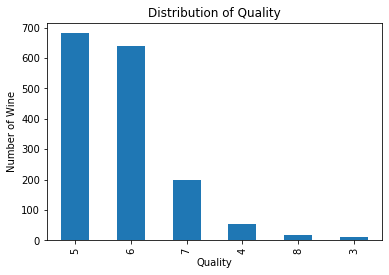

In [5]:
quality_counts = df["quality"].value_counts()
print(quality_counts)
quality = df["quality"]
quality_counts.plot(kind='bar')
plt.xlabel("Quality")
plt.ylabel("Number of Wine")
plt.title("Distribution of Quality")

## Distribution of each variable

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcd18cd8850>,
      dtype=object)

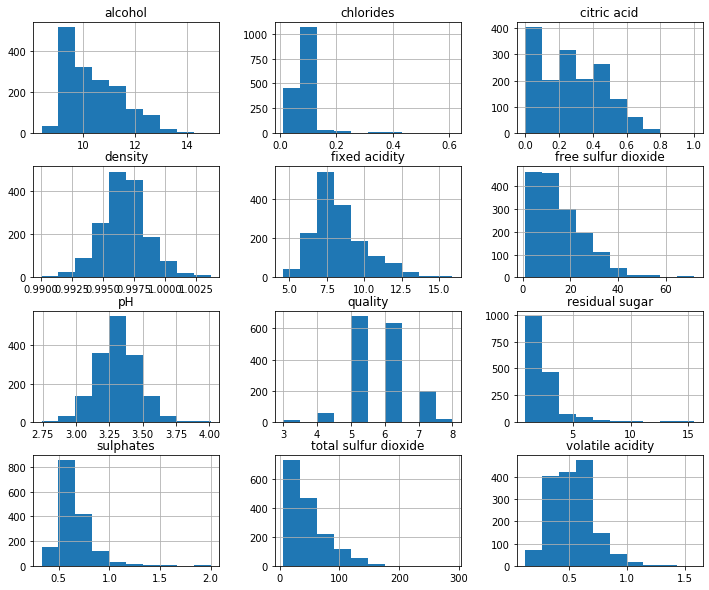

In [6]:
df.hist(figsize=(12,10))

## Relationship between each independent variable and quality

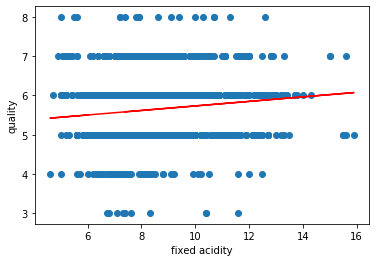

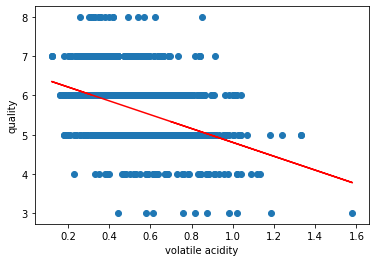

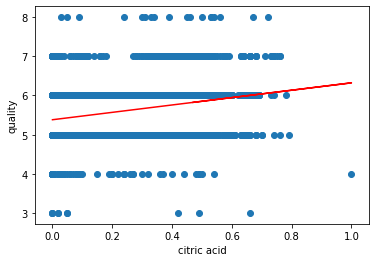

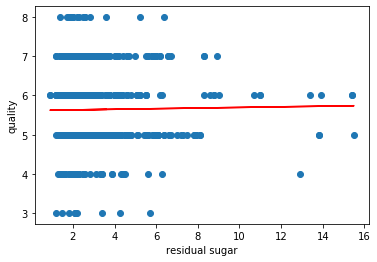

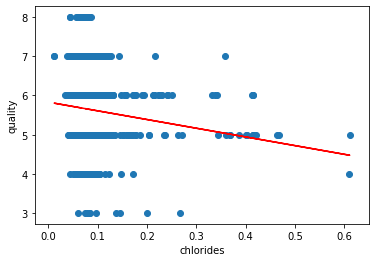

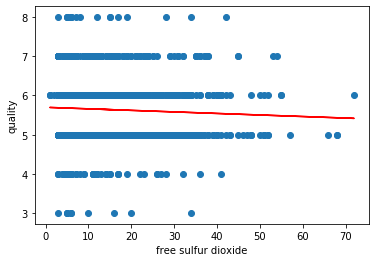

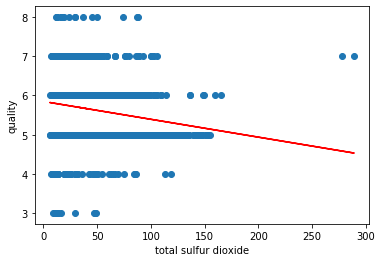

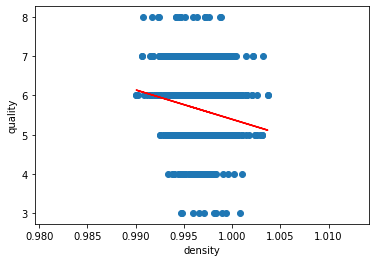

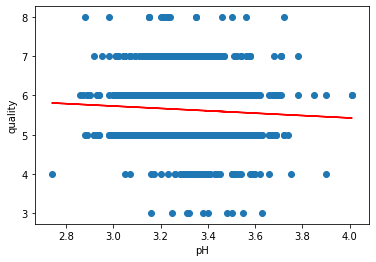

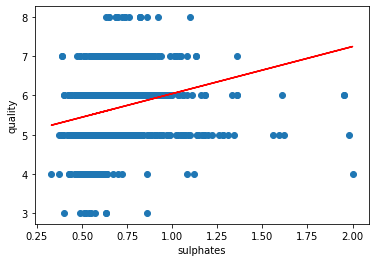

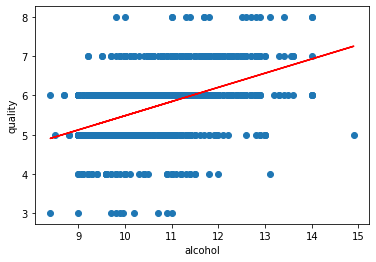

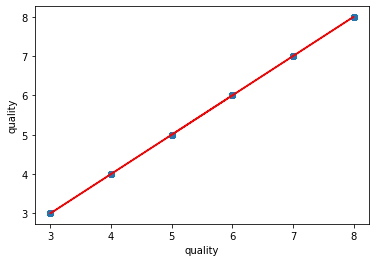

In [7]:
from scipy.stats import linregress
for c in df:
    x_values = df[f"{c}"]
    y_values = df['quality']
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.xlabel(f"{c}")
    plt.ylabel('quality')
    plt.show()

In [8]:
#correlation between each variable and target (quality)
corr = df.corr()
quality_corr =corr["quality"].sort_values(ascending=False)
print(quality_corr)

quality_corr.to_frame()

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64


,quality
quality,1.000000
alcohol,0.476166
sulphates,0.251397
citric acid,0.226373
fixed acidity,0.124052
residual sugar,0.013732
free sulfur dioxide,-0.050656
pH,-0.057731
chlorides,-0.128907
density,-0.174919


(12.0, 0.0)

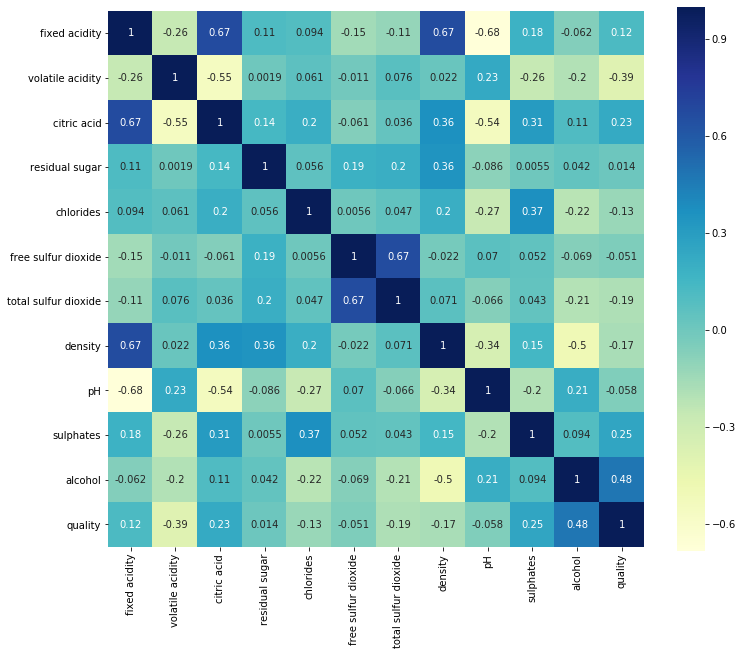

In [9]:
#looking at the correlation between each variables with seaborn
import seaborn as sns 
fig = plt.subplots(figsize=(12,10))
ax = sns.heatmap(corr,square=True,annot=True,cmap='YlGnBu')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)


## Multiple Linear Regression

In [62]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [63]:
X = df.drop("quality", axis = 1)
y = df["quality"].values.reshape(-1,1)

In [64]:
print(X.shape, y.shape)

(1599, 11) (1599, 1)


In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [66]:
#choosing between MinMax and StandardScaler - https://stackoverflow.com/questions/51237635/difference-between-standard-scaler-and-minmaxscaler/51237727
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)
#y_scaler = MinMaxScaler().fit(y_train)
#from sklearn.preprocessing import StandardScaler
#X_scaler = StandardScaler().fit(X_train)
#y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
#y_train_scaled = y_scaler.transform(y_train)
#y_test_scaled = y_scaler.transform(y_test)

In [67]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train)
#model.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

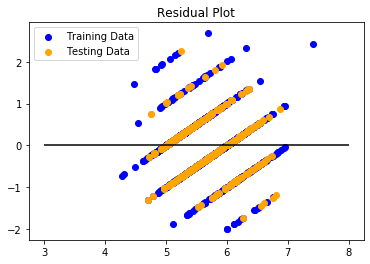

In [68]:
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
plt.title("Residual Plot")
plt.show()

In [69]:
print(f"Training Data Score: {model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model.score(X_test_scaled, y_test)}")

Training Data Score: 0.35485287452056635
Testing Data Score: 0.3722831200818113


In [17]:
from sklearn.metrics import mean_squared_error

prediction = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test, prediction)
#MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test)

print(f"MSE: {MSE}, R2: {r2}")


MSE: 0.388301738686892, R2: 0.3722831200818113


In [18]:
#basically same as above, but rounding the prediction values because they're in float (quality is in integer form at scale of 0-10) and want to see if there's any difference
prediction2 = model.predict(X_test_scaled)
rounded = np.rint(prediction2)

MSE = mean_squared_error(y_test, rounded)
r2 = model.score(X_test_scaled, y_test)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.45, R2: 0.3722831200818113


In [19]:
#https://stackoverflow.com/questions/39836318/comparing-arrays-for-accuracy - basically comparing the y_test and prediction values 
accuracy = (y_test == rounded).mean()
print(accuracy)

0.5875


In [20]:
#regression coefficients
pd.DataFrame({"Feature":X_train.columns.tolist(),"Coefficients":model.coef_[0]})

,Feature,Coefficients
0,fixed acidity,0.247018
1,volatile acidity,-1.472695
2,citric acid,-0.133904
3,residual sugar,0.129348
4,chlorides,-1.051591
5,free sulfur dioxide,0.335572
6,total sulfur dioxide,-1.034156
7,density,-0.220966
8,pH,-0.436803
9,sulphates,1.336306


## Other LR Models  
"Lasso will eliminate many features, and reduce overfitting in your linear model. Ridge will reduce the impact of features that are not important in predicting your y values. Elastic Net combines feature elimination from Lasso and feature coefficient reduction from the Ridge model to improve your model's predictions."
Source: https://medium.com/@vijay.swamy1/lasso-versus-ridge-versus-elastic-net-1d57cfc64b58#:~:text=Lasso%20will%20eliminate%20many%20features,to%20improve%20your%20model's%20predictions

In [21]:
# LASSO model
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train)

prediction3 = lasso.predict(X_test_scaled)
rounded3 = np.rint(prediction3)

MSE = mean_squared_error(y_test, rounded3)
r2 = lasso.score(X_test_scaled, y_test)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.52, R2: 0.310717015014498


In [22]:
# Ridge model
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train)

prediction4 = ridge.predict(X_test_scaled)
rounded4 = np.rint(prediction4)

MSE = mean_squared_error(y_test, rounded4)
r2 = ridge.score(X_test_scaled, y_test)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.45, R2: 0.3722567721011213


In [23]:
# ElasticNet model
from sklearn.linear_model import ElasticNet

elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train)

prediction5 = elasticnet.predict(X_test_scaled)
rounded5 = np.rint(prediction5)

MSE = mean_squared_error(y_test, rounded5)
r2 = elasticnet.score(X_test_scaled, y_test)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.4825, R2: 0.3217207149494742


## Getting Rid of Outliers

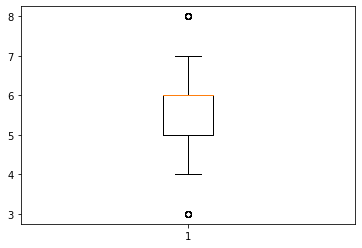

In [24]:
plt.boxplot(df["quality"])
plt.show()

In [25]:
#using IQR to identify outliers as this data is not normal (doesn't have a Gaussian-like distribution)
def remove_outliers(df):
    q1 = df["quality"].quantile(0.25)
    q3 = df["quality"].quantile(0.75)
    iqr = q3 - q1
    lower_cut = q1 - 1.5*iqr
    upper_cut = q3 + 1.5*iqr
    df_filtered = df.loc[(df["quality"] > lower_cut) & (df["quality"] < upper_cut)]
    return df_filtered 

In [26]:
df_filtered = remove_outliers(df)
df_filtered

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [27]:
quality_counts = df_filtered["quality"].value_counts()
quality_counts

5    681
6    638
7    199
4     53
Name: quality, dtype: int64

In [28]:
newX = df_filtered.drop("quality", axis = 1)
newY = df_filtered["quality"].values.reshape(-1,1)

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(newX, newY, random_state=42)

In [30]:
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)
#y_scaler = MinMaxScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
#y_train_scaled = y_scaler.transform(y_train)
#y_test_scaled = y_scaler.transform(y_test)

In [31]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train)
#model.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
prediction6 = model.predict(X_test_scaled)
rounded6 = np.rint(prediction6)

MSE = mean_squared_error(y_test, rounded6)
r2 = model.score(X_test_scaled, y_test)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.4631043256997455, R2: 0.3802055201805128


## Principal Component Analysis - PCA 
"Principal component regression is a technique for computing regressions when the explanatory variables are highly correlated" 
Source: https://blogs.sas.com/content/iml/2017/10/25/principal-component-regression-drawbacks.html 


In [33]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
#i tried all the possible n_components and no n_component showed a stronger result than the first LR result

pc = pca.fit_transform(X)

print(X.shape)
print(pc.shape)

(1599, 11)
(1599, 10)


In [34]:
pc_df = pd.DataFrame(pc)
pc_df = pd.concat([pc_df, df[['quality']]], axis = 1)
pc_df.head()

,0,1,2,3,4,5,6,7,8,9,quality
0,-13.224905,-2.023900,-1.126821,-0.399233,-1.085389,-0.198018,0.031547,-0.147051,0.006047,0.008585,5
1,22.037724,4.408322,-0.310378,-0.199938,-0.557109,-0.301325,0.223874,0.143165,-0.089312,-0.015483,5
2,7.162673,-2.501461,-0.581868,-0.219069,-0.552934,-0.205114,0.136190,0.058480,-0.084793,-0.005749,5
3,13.430063,-1.951122,2.634040,-1.574059,-0.063806,0.089092,-0.218923,-0.062244,0.006281,0.004586,6
4,-13.224905,-2.023900,-1.126821,-0.399233,-1.085389,-0.198018,0.031547,-0.147051,0.006047,0.008585,5


In [35]:
pcX = pc_df.drop("quality", axis = 1)
pcY = pc_df["quality"].values.reshape(-1,1)

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(pcX, pcY, random_state=42)

In [37]:
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)
#y_scaler = MinMaxScaler().fit(y_train)
#from sklearn.preprocessing import StandardScaler
#X_scaler = StandardScaler().fit(X_train)
#y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [38]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
from sklearn.metrics import mean_squared_error

prediction7 = model.predict(X_test_scaled)
rounded7 = np.rint(prediction7)

MSE = mean_squared_error(y_test, rounded7)
r2 = model.score(X_test_scaled, y_test)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.4525, R2: 0.3718517137072427


## Ordinal Regression
"Ordinal logistic regression (often just called 'ordinal regression') is used to predict an ordinal dependent variable given one or more independent variables."
https://pythonhosted.org/mord/#

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [53]:
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [54]:
import mord as m
classifier = m.LogisticIT()

In [55]:
classifier.fit(X_train_scaled, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticIT(alpha=1.0, max_iter=1000, verbose=0)

In [56]:
print(f"Training Data Score: {classifier.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")

Training Data Score: 0.5963302752293578
Testing Data Score: 0.5775


In [50]:
prediction8 = classifier.predict(X_test_scaled)

In [51]:
actual = np.array(y_test)
actual_df = pd.DataFrame(y_test.flatten())
actual_df["Predicted"] = prediction8
comparison = actual_df.rename(columns = {0: "Actual"})
comparison.head(10)

,Actual,Predicted
0,6,5
1,5,5
2,6,6
3,5,5
4,6,6
5,5,5
6,5,5
7,5,5
8,5,6
9,6,6


In [61]:
all_scores = pd.DataFrame(
    {"Model" : ["Multiple Linear Regression", "Lasso", "Ridge", "Elastic Net", "No Outliers - MLR", "PCA", "Ordinal Regression"],
     "Score" : [0.372, 0.311, 0.372, 0.322, 0.380, 0.372, 0.578]
    })
all_scores.set_index("Model")

,Score
Model,
Multiple Linear Regression,0.372
Lasso,0.311
Ridge,0.372
Elastic Net,0.322
No Outliers - MLR,0.380
PCA,0.372
Ordinal Regression,0.578
